# Categorization of Amazon Toys Products

## Using Natural Language Processing (NLP)

#### Data Loading

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import json
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/rawdata1.csv", encoding='latin-1')

#### Data Understanding and Preprocessing

In [3]:
data.head()

,Identifier,Item_Name,Product_Description,Brand,Manufacturer,Category,Subcategory
0,B019YGSAPW,Ravensburger Spiele 23409 - Schwarzer Peter Mi...,<h5>Ravensburger Spiele 23409 - Schwarzer Pete...,Ravensburger Spiele,Ravensburger Spiele,0300 Games & Puzzles,0305 Children's Games
1,B000QGRCN6,Henrys A01002-S01 - Yo-Yo Ersatzschnüre 6 Stüc...,Yo-Yo,Henrys,Henrys,0900 Outdoor & Sports Toys,0911 Playground Equipment
2,B00KB45ULE,"London Teddy Bears 4X-CLQL-QFJN Sorry, es TUT ...","Liebenswürdig, traditionelle braune teddybär i...",London Teddy Bears,London Teddy Bears,0700 Plush,0710 Traditional Plush
3,B07NDXZ8ZH,KiddyMoon 90X30cm/300 Bälle ? 7Cm Bällebad Bab...,NaN,KiddyMoon,KiddyMoon,0900 Outdoor & Sports Toys,0911 Playground Equipment
4,B079QGYCS7,Eichhorn 100003408 - Musik Set enthält Trommel...,"Musik Set, Eigenschaften: Maraca-Ei, mit Tromm...",Eichhorn,Simba-Dickie,1300 All Other,1305 Miscellaneous Toys


In [4]:
data.isna().any()

Identifier             False
Item_Name              False
Product_Description     True
Brand                   True
Manufacturer            True
Category               False
Subcategory             True
dtype: bool

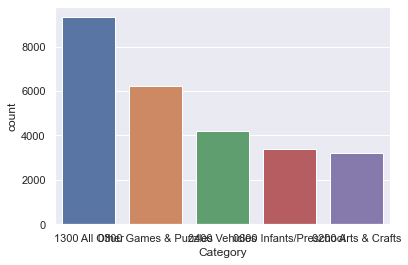

In [27]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Category", data=data, order=data.Category.value_counts().iloc[:5].index)

In [6]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [7]:
data['Clean_name'] = data['Item_Name'].apply(lambda x: clean_text(x))

In [8]:
data.head()

,Identifier,Item_Name,Product_Description,Brand,Manufacturer,Category,Subcategory,Clean_name
0,B019YGSAPW,Ravensburger Spiele 23409 - Schwarzer Peter Mi...,<h5>Ravensburger Spiele 23409 - Schwarzer Pete...,Ravensburger Spiele,Ravensburger Spiele,0300 Games & Puzzles,0305 Children's Games,ravensburger spiele 23409 - schwarzer peter mi...
1,B000QGRCN6,Henrys A01002-S01 - Yo-Yo Ersatzschnüre 6 Stüc...,Yo-Yo,Henrys,Henrys,0900 Outdoor & Sports Toys,0911 Playground Equipment,henrys a01002-s01 - yo-yo ersatzschnüre 6 stüc...
2,B00KB45ULE,"London Teddy Bears 4X-CLQL-QFJN Sorry, es TUT ...","Liebenswürdig, traditionelle braune teddybär i...",London Teddy Bears,London Teddy Bears,0700 Plush,0710 Traditional Plush,"london teddy bears 4x-clql-qfjn sorry, es tut ..."
3,B07NDXZ8ZH,KiddyMoon 90X30cm/300 Bälle ? 7Cm Bällebad Bab...,NaN,KiddyMoon,KiddyMoon,0900 Outdoor & Sports Toys,0911 Playground Equipment,kiddymoon 90x30cm/300 bälle ? 7cm bällebad bab...
4,B079QGYCS7,Eichhorn 100003408 - Musik Set enthält Trommel...,"Musik Set, Eigenschaften: Maraca-Ei, mit Tromm...",Eichhorn,Simba-Dickie,1300 All Other,1305 Miscellaneous Toys,eichhorn 100003408 - musik set enthält trommel...


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39500 entries, 0 to 39499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Identifier           39500 non-null  object
 1   Item_Name            39500 non-null  object
 2   Product_Description  37401 non-null  object
 3   Brand                38663 non-null  object
 4   Manufacturer         39426 non-null  object
 5   Category             39500 non-null  object
 6   Subcategory          38992 non-null  object
 7   Clean_name           39500 non-null  object
dtypes: object(8)
memory usage: 2.4+ MB


In [58]:
categories = []
categories = data.Category.unique().tolist()

print(categories)

['0300 Games & Puzzles', '0900 Outdoor & Sports Toys', '0700 Plush', '1300 All Other', '0600 Infants/Preschool', '0100 Dolls', '0400 Vehicles', '1800 Learning & Exploration', '0800 Action Figures & Accessories', '0200 Arts & Crafts', '1900 Building Sets', '0206 Craft Kits', '1802 Educational Toys', '0625 PS Role Playing', '0202 Sculpture Kits / Supplies', '0201 Clay / Dough', '0402 Non-Powered Cars']


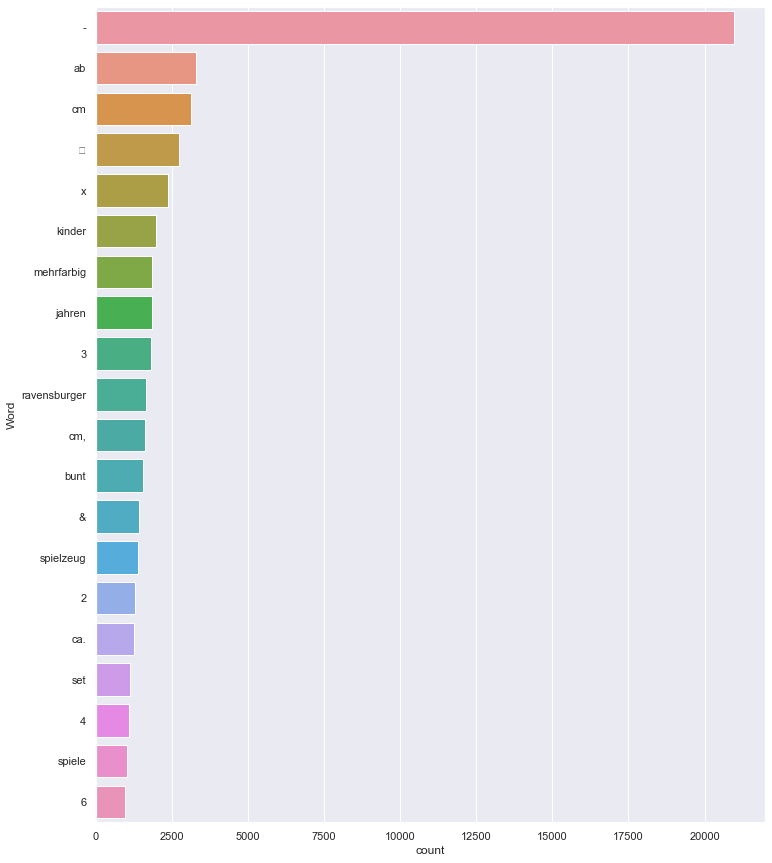

In [63]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(data['Clean_name'], 20)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weiherer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('german'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['Clean_name'] = data['Clean_name'].apply(lambda x: remove_stopwords(x))

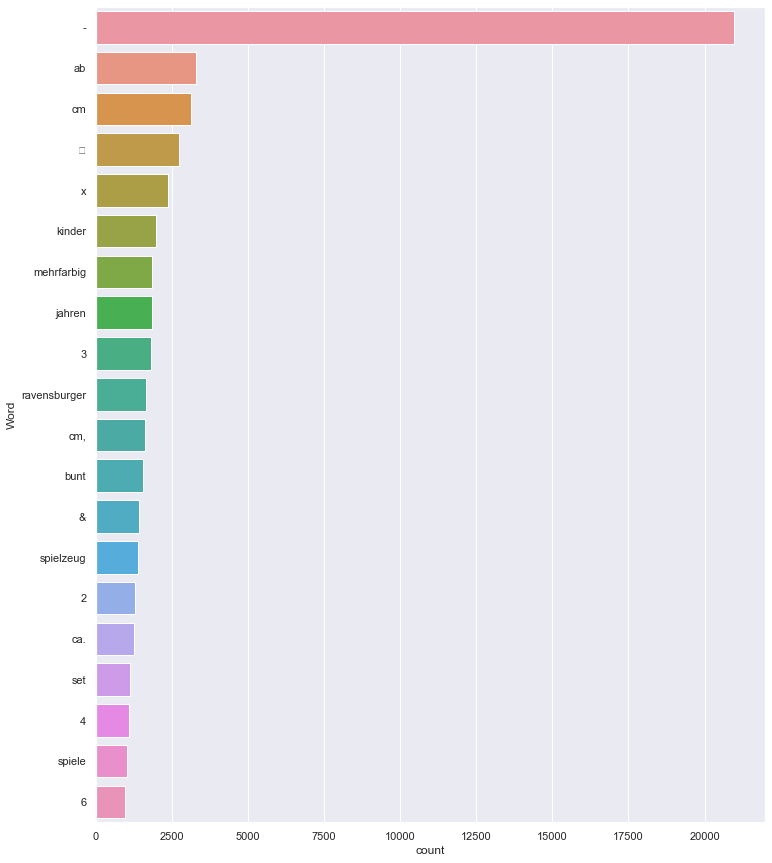

In [13]:
freq_words(data['Clean_name'], 20)

#### Converting Text to Features

In [37]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['Category'])

# transform target variable
y = multilabel_binarizer.transform(data['Category'])

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [39]:
xtrain, xval, ytrain, yval = train_test_split(data['Clean_name'], y, test_size=0.2, random_state=9)

In [40]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [41]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [42]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [43]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

c:\python\phyton37\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label 0 is present in all training examples.
  str(classes[c]))
c:\python\phyton37\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label 4 is present in all training examples.
  str(classes[c]))
c:\python\phyton37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [44]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [60]:
multilabel_binarizer.inverse_transform(y_pred)[2]

(' ', '0', '1', '3', 'A', 'O', 'e', 'h', 'l', 'r', 't')